# Identifying Fund Category
Based on a model or portfolios asset allocation, is it possible to identify the fund category with the use of machine learning.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#fund category data
import glob

file_list = glob.glob('./datafiles/morningstar/*.csv')
file_list

df_list = []
for i in file_list:
    df = pd.read_csv(i)
    df_list.append(df)

ms = pd.concat(df_list)
ms = ms.rename(columns={'Ticker':'Symbol'})
print (ms.info())
ms.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822943 entries, 0 to 4
Data columns (total 14 columns):
CUSIP                     822943 non-null object
CategoryName              822943 non-null object
EquityStyleboxName        26939 non-null object
EquityStyleboxShort       26939 non-null object
FundName                  822943 non-null object
IndexStrategyBoxVerbal    27171 non-null object
MStarID                   822943 non-null object
MorninstarStylebox        26939 non-null object
ProviderCompanyName       795772 non-null object
SecurityType              822943 non-null object
ShareClassType            822943 non-null object
Symbol                    822943 non-null object
Unnamed: 11               0 non-null float64
Unnamed: 8                0 non-null float64
dtypes: float64(2), object(12)
memory usage: 94.2+ MB
None


,CUSIP,CategoryName,EquityStyleboxName,EquityStyleboxShort,FundName,IndexStrategyBoxVerbal,MStarID,MorninstarStylebox,ProviderCompanyName,SecurityType,ShareClassType,Symbol,Unnamed: 11,Unnamed: 8
0,06828M306,Foreign Large Growth,NaN,NaN,Baron International Growth Retail,,FOUSA08N5P,NaN,NaN,FO,Adv,BIGFX,NaN,NaN
1,47804A817,Diversified Emerging Mkts,NaN,NaN,JHancock Emerging Markets NAV,,FOUSA06GNT,NaN,NaN,FO,Other,JEVNX,NaN,NaN
2,39137C503,High Yield Bond,NaN,NaN,Great-West Putnam High Yield Bond Inv,,FOUSA04AI3,NaN,NaN,FO,Other,MXHYX,NaN,NaN
3,39137C305,Intermediate-Term Bond,NaN,NaN,Great-West Core Bond Inv,,FOUSA04AI2,NaN,NaN,FO,Other,MXFDX,NaN,NaN
4,245908736,High Yield Bond,NaN,NaN,Delaware High-Yield Opportunities R,,FOUSA04AHR,NaN,NaN,FO,Retirement,DHIRX,NaN,NaN


In [4]:
#asset allocation data
import glob

file_list = glob.glob('./datafiles/XigniteAssetClassification/Classification_*.csv')
file_list

df_list = []
for i in file_list:
    df = pd.read_csv(i, sep='|')
    df_list.append(df)

pdsecac = pd.concat(df_list)

pdsecac.drop_duplicates(inplace=True)
print (pdsecac.info())
pdsecac.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977158 entries, 0 to 8755
Data columns (total 20 columns):
AsOfDate                int64
Valoren                 int64
CUSIP                   object
ISIN                    object
SEDOL                   float64
Currency                object
Exchange                object
Symbol                  object
Name                    object
ShortName               object
Prefix                  object
Suffix                  object
InstrumentClass         object
CFICode                 object
CountryName             object
CountryCode             object
CategoryName            object
ClassificationName      object
AllocationPercentage    float64
LastModified            int64
dtypes: float64(2), int64(3), object(15)
memory usage: 316.8+ MB
None


,AsOfDate,Valoren,CUSIP,ISIN,SEDOL,Currency,Exchange,Symbol,Name,ShortName,Prefix,Suffix,InstrumentClass,CFICode,CountryName,CountryCode,CategoryName,ClassificationName,AllocationPercentage,LastModified
0,91020180700,998291,Z69303206,XC0009695252,NaN,CAD,XTSE,0000,S&P Indices S&P/TSX Composite Index,S&P/TSX Composite,S&P/TSX Composite Index,NaN,Indices,MRIXXX,United States,US,Sector,Unknown,100.0,41820181754
1,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Asset class,Stock,100.0,11820180922
2,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Sector,Miscellaneous,100.0,11820180922
3,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Country,CA,100.0,11820180922
4,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Style,High Risk Low Reward,100.0,11820180922


In [6]:
pdsecac.ClassificationName[pdsecac.CategoryName=='Asset class'].unique()

array(['Stock', 'Bond', 'Derivative', 'DepositoryReceipt', 'US stocks',
       nan, 'Non-US stocks', 'Cash', 'US bonds', 'Non-US bonds',
       'Preferred stocks', 'Convertible', 'Other'], dtype=object)

In [11]:
#rename Stock to US stocks and Bond to US bonds
pdsecac.ClassificationName = pdsecac.ClassificationName.str.replace('Stock','US stocks')
pdsecac.ClassificationName = pdsecac.ClassificationName.str.replace('Bond','US bonds')

In [12]:
#pivot the asset class data to make it tidy
subasset = pdsecac[pdsecac.CategoryName.isin(['Asset class'])]
pdsecac_pivot = subasset.pivot_table(
        index=['Symbol','Exchange','CUSIP'], 
         columns='ClassificationName', 
         values='AllocationPercentage',
         aggfunc='first'
).reset_index()

pdsecac_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180186 entries, 0 to 180185
Data columns (total 13 columns):
Symbol               180186 non-null object
Exchange             180186 non-null object
CUSIP                180186 non-null object
Cash                 29458 non-null float64
Convertible          8460 non-null float64
DepositoryReceipt    3625 non-null float64
Derivative           45312 non-null float64
Non-US bonds         13056 non-null float64
Non-US stocks        21285 non-null float64
Other                15519 non-null float64
Preferred stocks     8302 non-null float64
US bonds             76420 non-null float64
US stocks            63311 non-null float64
dtypes: float64(10), object(3)
memory usage: 17.9+ MB


In [13]:
#fill missing asset allocation values with 0
pdsecac_pivot = pdsecac_pivot.fillna(0)

In [14]:
pdsecac_pivot.head()

ClassificationName,Symbol,Exchange,CUSIP,Cash,Convertible,DepositoryReceipt,Derivative,Non-US bonds,Non-US stocks,Other,Preferred stocks,US bonds,US stocks
0,01HL,XLON,G5775RAA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,01KG,XLON,G78834AC5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2,01LQ,XLON,G7932EAR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
3,01NL,XLON,G92450DJ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
4,01NN,XLON,G87534AF3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0


In [15]:
#merge the category data with the asset classification data on Symbol
subms = pd.merge(pdsecac_pivot, ms[['Symbol','CategoryName']], how='left', on=['Symbol'])
#remove null and blank CategoryName rows
subms = subms[subms.CategoryName.isnull()==False] 
subms = subms[subms.CategoryName != ' '] 
subms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32993 entries, 3363 to 182454
Data columns (total 14 columns):
Symbol               32993 non-null object
Exchange             32993 non-null object
CUSIP                32993 non-null object
Cash                 32993 non-null float64
Convertible          32993 non-null float64
DepositoryReceipt    32993 non-null float64
Derivative           32993 non-null float64
Non-US bonds         32993 non-null float64
Non-US stocks        32993 non-null float64
Other                32993 non-null float64
Preferred stocks     32993 non-null float64
US bonds             32993 non-null float64
US stocks            32993 non-null float64
CategoryName         32993 non-null object
dtypes: float64(10), object(4)
memory usage: 3.8+ MB


In [17]:
#only use categories which have over 200 or more rows of for each category
num = list(subms.CategoryName.unique())
catnamlist = [x for x in num if (len(subms[subms.CategoryName==x]) > 200)]
catnamlist.remove('Other')
subms = subms[subms.CategoryName.isin(catnamlist)]
subms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24939 entries, 17241 to 182454
Data columns (total 14 columns):
Symbol               24939 non-null object
Exchange             24939 non-null object
CUSIP                24939 non-null object
Cash                 24939 non-null float64
Convertible          24939 non-null float64
DepositoryReceipt    24939 non-null float64
Derivative           24939 non-null float64
Non-US bonds         24939 non-null float64
Non-US stocks        24939 non-null float64
Other                24939 non-null float64
Preferred stocks     24939 non-null float64
US bonds             24939 non-null float64
US stocks            24939 non-null float64
CategoryName         24939 non-null object
dtypes: float64(10), object(4)
memory usage: 2.9+ MB


In [20]:
#to have a balanced weighting of each category represented, we sample 200 entries from each category
samdf = pd.DataFrame()
for i in catnamlist:
    newdf = subms[subms.CategoryName==i].sample(n=200,replace=False)
    samdf = samdf.append(newdf)
samdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 109416 to 167958
Data columns (total 14 columns):
Symbol               10800 non-null object
Exchange             10800 non-null object
CUSIP                10800 non-null object
Cash                 10800 non-null float64
Convertible          10800 non-null float64
DepositoryReceipt    10800 non-null float64
Derivative           10800 non-null float64
Non-US bonds         10800 non-null float64
Non-US stocks        10800 non-null float64
Other                10800 non-null float64
Preferred stocks     10800 non-null float64
US bonds             10800 non-null float64
US stocks            10800 non-null float64
CategoryName         10800 non-null object
dtypes: float64(10), object(4)
memory usage: 1.2+ MB


In [51]:
#list the CategoryName
samdf.CategoryName.unique()

array(['World Allocation', 'Large Blend', 'Large Growth',
       'Allocation--70% to 85% Equity', 'Tactical Allocation',
       'Allocation--50% to 70% Equity', 'Allocation--30% to 50% Equity',
       'Intermediate-Term Bond', 'Mid-Cap Value', 'Target-Date 2020',
       'Large Value', 'Mid-Cap Blend', 'Foreign Large Growth',
       'Target-Date 2025', 'Diversified Emerging Mkts',
       'Multisector Bond', 'Foreign Large Value', 'Target-Date 2030',
       'Target-Date 2035', 'Target-Date 2040', 'High Yield Muni',
       'Target-Date 2045', 'Nontraditional Bond', 'World Large Stock',
       'Target-Date 2050', 'Muni National Long', 'Mid-Cap Growth',
       'Small Growth', 'Target-Date 2055', 'Target-Date 2060+',
       'Multialternative', 'Small Value', 'Short-Term Bond',
       'Small Blend', 'Muni National Short',
       'Allocation--15% to 30% Equity', 'Muni National Interm',
       'High Yield Bond', 'Intermediate Government',
       'Emerging Markets Bond', 'Inflation-Protected Bon

100.00005000000002
Cash                  6.79135
Convertible           0.20365
DepositoryReceipt     0.00000
Derivative            0.00000
Non-US bonds          6.38365
Non-US stocks        15.24390
Other                 1.85350
Preferred stocks      0.16280
US bonds             40.77850
US stocks            28.58270
dtype: float64


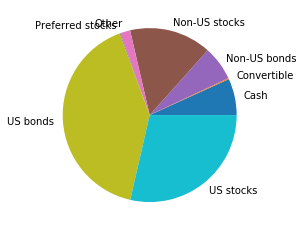

In [52]:
#visualize the mean asset breakdown of a 'Target-Date 2020' category
import matplotlib.pyplot as plt
realest = samdf[samdf.CategoryName=='Target-Date 2020']
print (realest.mean(axis=0).sum())
print (realest.mean(axis=0))
realest.mean(axis=0).plot(kind='pie')
plt.ylabel('')
plt.show()

99.99909999999997
Cash                  3.72085
Convertible           0.09300
DepositoryReceipt     0.00000
Derivative            0.00000
Non-US bonds          1.80150
Non-US stocks        30.61240
Other                 1.48800
Preferred stocks      0.11730
US bonds              9.37995
US stocks            52.78610
dtype: float64


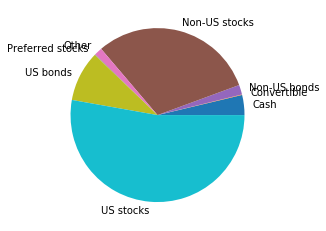

In [53]:
#visualize the mean asset breakdown of a 'Target-Date 2050' category
realest = samdf[samdf.CategoryName=='Target-Date 2050']
print (realest.mean(axis=0).sum())
print (realest.mean(axis=0))
realest.mean(axis=0).plot(kind='pie')
plt.ylabel('')
plt.show()

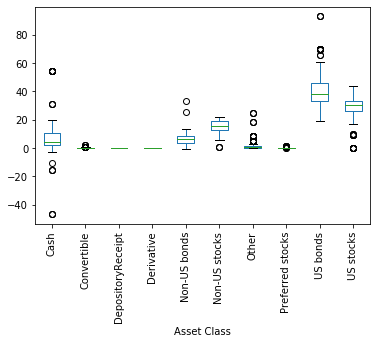

In [54]:
#look for any outliers in the 'Target-Date 2020' Category
samdf[samdf.CategoryName=='Target-Date 2020'].plot(kind='box')
plt.xlabel('Asset Class')
plt.xticks(rotation=90)
plt.show()

In [55]:
#separate the features and the target
features = samdf.drop(columns=['CategoryName','Symbol','Exchange','CUSIP'])
target = samdf.CategoryName

In [56]:
#create training and validation data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.15)

In [57]:
#scale the data
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
X_train= stan.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features.columns)

X_test = stan.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features.columns)

In [58]:
#test decision tree model
x = X_train
y = y_train

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
print (cross_val_score(clf,x,y,cv=10).mean())

0.7605129393081771


In [59]:
#test random forest model
x = X_train
y = y_train

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print (cross_val_score(clf,x,y,cv=10).mean())

0.7665231157039225


In [60]:
#test naive bayes model
x = X_train
y = y_train

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
clf = BernoulliNB()
print (cross_val_score(clf,x,y,cv=10).mean())

0.1813203804180195


In [61]:
#test Kneighbors model
x = X_train
y = y_train

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(1)
print (cross_val_score(kn,x,y,cv=10).mean())

0.7593966302228531


In [62]:
#Tune RandomforestModel
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('clf', RandomForestClassifier(random_state=0)) ])
fit_pipe = text_clf.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV

parameters = {
             'clf__max_depth':range(5,100,5),
             #'clf__max_leaf_nodes':range(2,100,1),
             }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=1)
gs_clf.fit(X_train,y_train)
fit_grid = gs_clf.fit(X_train,y_train)
print (fit_grid.score(X_test,y_test)) 
print (fit_grid.best_params_)
bparam = fit_grid.best_params_

0.7796296296296297
{'clf__max_depth': 45}


In [63]:
#create new model with tuned parameters
clf = RandomForestClassifier(max_depth=bparam['clf__max_depth']).fit(X_train,y_train)
clf.score(X_test,y_test)

0.7870370370370371

In [64]:
#check classification report on tuned model
from sklearn.metrics import classification_report,confusion_matrix
predicted = clf.predict(X_test)
print (classification_report(y_test,predicted))
cr = (classification_report(y_test,predicted,output_dict=True))
dfcr = pd.DataFrame(cr).transpose()

                               precision    recall  f1-score   support

Allocation--15% to 30% Equity       0.89      0.91      0.90        35
Allocation--30% to 50% Equity       0.96      0.90      0.93        30
Allocation--50% to 70% Equity       0.79      0.82      0.81        28
Allocation--70% to 85% Equity       0.83      0.93      0.88        27
                    Bank Loan       0.83      0.65      0.73        23
               Corporate Bond       0.83      0.91      0.87        33
    Diversified Emerging Mkts       0.58      0.75      0.65        20
        Emerging Markets Bond       0.91      1.00      0.95        31
   Energy Limited Partnership       0.35      0.91      0.51        23
          Foreign Large Blend       0.76      0.73      0.75        30
         Foreign Large Growth       0.87      0.90      0.89        30
          Foreign Large Value       0.86      0.68      0.76        28
           Global Real Estate       0.97      0.88      0.92        32
     

In [65]:
#scale and fit the model with all the data
stan_features = stan.transform(features)
clf=RandomForestClassifier(max_depth=40).fit(stan_features,target)

In [66]:
#save the model and the standard scalar to files
import pickle
with open('modeliden.pkl', 'wb') as fid:
    pickle.dump(clf, fid,2) 
    
with open('stan.pkl', 'wb') as fid:
    pickle.dump(stan, fid,2)     
    

In [67]:
#[[cash_api,convertible_api,depreceipt_api,derevative_api,nonusbond_api,nonusstock_api,other_api,prefstock_api,usbond_api,usstock_api]]
test1 = [[-600,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  700,
           0.  ,    0.  ,    0.  ]]
test1 = stan.transform(test1)
print (clf.predict(test1))
print (clf.predict_proba(test1).max(axis=1))

['Multialternative']
[1.]


In [68]:
test1 = [[-600,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  700,
           0.  ,    0.  ,    0.  ]]
test1 = stan.transform(test1)
#print (clf.predict(test1))
prob =  (clf.predict_proba(test1)[0]*100)
comb = list(zip(clf.classes_,prob))
pd.DataFrame(comb,columns=['Category','Confidence']).sort_values('Confidence',ascending=False).head(5)

,Category,Confidence
25,Multialternative,100.0
0,Allocation--15% to 30% Equity,0.0
40,Target-Date 2025,0.0
30,Muni Single State Long,0.0
31,Nontraditional Bond,0.0


#Saved Model is uploaded to Heroku
https://modelcategory.herokuapp.com/